In [3]:
#import the packages 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import highlight_text

In [4]:
#importing the data 
df = pd.read_csv('passingstats.csv')

In [5]:
df

,Player,Pos,Squad,90s,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11
2,Che Adams\Che-Adams,FW,Southampton,19.0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36
4,Adrián\Adrian,GK,Liverpool,2.0,0
...,...,...,...,...,...
492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74
493,Andi Zeqiri\Andi-Zeqiri,FWDF,Brighton,0.8,1
494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39
495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42


In [6]:
#create a new column for progressive per 90
df['per90'] = df['Prog'] / df['90s']
df.head()

,Player,Pos,Squad,90s,Prog,per90
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,Adrián\Adrian,GK,Liverpool,2.0,0,0.000000


In [7]:
#filtering the data for the players who have played more than 6.5 90s
df = df[df['90s'] >= 6.5].reset_index()

In [8]:
#also removing the goalkeepers and also by putting the index value in correct order
df = df[df['Pos'] != 'GK'].reset_index()

In [9]:
df.head(20)

,level_0,index,Player,Pos,Squad,90s,Prog,per90
0,0,0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,1,1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,2,2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,3,3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,4,6,Ola Aina\Ola-Aina,DF,Fulham,17.7,69,3.898305
5,5,7,Rayan Aït Nouri\Rayan-Ait-Nouri,DF,Wolves,7.7,18,2.337662
6,6,8,Semi Ajayi\Semi-Ajayi,DF,West Brom,22.0,46,2.090909
7,7,10,Marc Albrighton\Marc-Albrighton,FWDF,Leicester City,11.6,52,4.482759
8,8,11,Thiago Alcántara\Thiago-Alcantara,MF,Liverpool,8.3,82,9.879518
9,9,12,Toby Alderweireld\Toby-Alderweireld,DF,Tottenham,13.9,31,2.230216


In [10]:
#creating a beeswarm plot for all by setting up  constant colors
background = '#313332'
text_color = 'white'


Text(0.5, 0, 'Progressive Passes per 90')

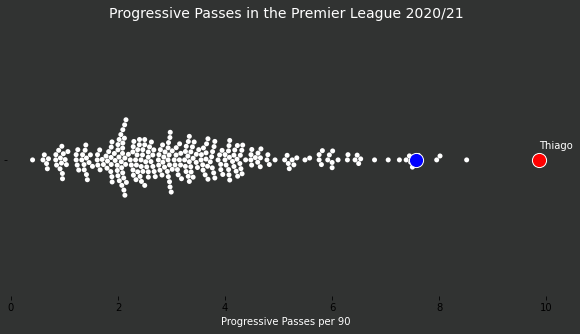

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='per90',data=df,color='white',zorder=1)

#plot thiago
plt.scatter(x=9.87,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='Thiago',x=9.87,y=-.04,c=text_color)

#plot de bruyne
plt.scatter(x=7.564,y=0,c='blue',edgecolor='white',s=200,zorder=2)

plt.title('Progressive Passes in the Premier League 2020/21',c=text_color,fontsize=14)

plt.xlabel('Progressive Passes per 90',c=text_color)

In [12]:
##--------------------------------/Single player/--------------------------------------

#new import of file
df2 = pd.read_csv('D:\\Football Data Analysis\\Viz-Templates-master\\passingstats_PL.csv')

In [13]:
df2.head(10)

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,Che Adams\Che-Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,Adrián\Adrian,es ESP,GK,Liverpool,2.0,43,62,69.4,1147,723,0,0.0,0.0,0,0,0,0,0
5,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,1.6,33,42,78.6,386,58,0,0.6,-0.6,3,2,1,0,1
6,Ola Aina\Ola-Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.3,-0.3,8,66,11,6,69
7,Rayan Aït Nouri\Rayan-Ait-Nouri,fr FRA,DF,Wolves,7.7,299,357,83.8,4712,1364,1,0.7,0.3,6,13,6,3,18
8,Semi Ajayi\Semi-Ajayi,ng NGA,DF,West Brom,22.0,553,763,72.5,12087,5164,0,0.1,-0.1,2,50,3,0,46
9,Nathan Aké\Nathan-Ake,nl NED,DF,Manchester City,5.2,429,461,93.1,7845,2158,0,0.0,0.0,1,36,0,0,23


In [14]:
#splitting of player names
df2['Player'] = df2['Player'].str.split('\\',expand = True)[0]
#filtering out Gk and player with more than equal to 6.5 90's
df2 = df2[df2['Pos'] != 'GK']
df2= df2[df2['90s'] >= 6.5].reset_index()

In [15]:
df.head(10)

,level_0,index,Player,Pos,Squad,90s,Prog,per90
0,0,0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,1,1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,2,2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,3,3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,4,6,Ola Aina\Ola-Aina,DF,Fulham,17.7,69,3.898305
5,5,7,Rayan Aït Nouri\Rayan-Ait-Nouri,DF,Wolves,7.7,18,2.337662
6,6,8,Semi Ajayi\Semi-Ajayi,DF,West Brom,22.0,46,2.090909
7,7,10,Marc Albrighton\Marc-Albrighton,FWDF,Leicester City,11.6,52,4.482759
8,8,11,Thiago Alcántara\Thiago-Alcantara,MF,Liverpool,8.3,82,9.879518
9,9,12,Toby Alderweireld\Toby-Alderweireld,DF,Tottenham,13.9,31,2.230216


In [16]:
#create a new column for progressive per 90(fixing of the dataframe)
#prog:completed passes that move the ball towards the opp goal atleast 10 yards or 6 passes
df2['per90'] = df2['Prog'] / df2['90s']
df2['1/3'] = df2['1/3'] / df2['90s'] #completed passes that enter the 1/3 field
df2['xA'] = df2['xA'] / df2['90s'] #xG assisted:xG which follows a pass that assist a shot
df2['KP'] = df2['KP'] / df2['90s'] #pass that directly leads to a shot(assist)
df2['PPA'] = df2['PPA'] / df2['90s'] #Completed pass in the 18 yard box

In [17]:
df2.head(10)

,index,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,per90
0,0,Patrick van Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.068376,0.2,0.940171,3.675214,1.794872,4,76,6.495726
1,1,Tammy Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.084906,0.1,0.754717,1.132075,0.188679,0,11,1.037736
2,2,Che Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,0.226316,-0.3,1.157895,1.052632,0.631579,0,38,2.000000
3,3,Tosin Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.005556,-0.1,0.166667,2.166667,0.111111,0,36,2.000000
4,6,Ola Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.016949,-0.3,0.451977,3.728814,0.621469,6,69,3.898305
5,7,Rayan Aït Nouri,fr FRA,DF,Wolves,7.7,299,357,83.8,4712,1364,1,0.090909,0.3,0.779221,1.688312,0.779221,3,18,2.337662
6,8,Semi Ajayi,ng NGA,DF,West Brom,22.0,553,763,72.5,12087,5164,0,0.004545,-0.1,0.090909,2.272727,0.136364,0,46,2.090909
7,10,Marc Albrighton,eng ENG,FWDF,Leicester City,11.6,343,507,67.7,5965,2483,2,0.224138,-0.6,1.551724,2.844828,2.155172,11,52,4.482759
8,11,Thiago Alcántara,es ESP,MF,Liverpool,8.3,664,748,88.8,14012,3524,0,0.096386,-0.8,1.445783,10.240964,1.204819,1,83,10.000000
9,12,Toby Alderweireld,be BEL,DF,Tottenham,13.9,541,670,80.7,12608,3626,0,0.014388,-0.2,0.215827,3.237410,0.287770,1,31,2.230216


In [18]:
#creating a list for 6 metrics
metrics = ['Prog','1/3','xA','Cmp%','KP','PPA'] # Cmp%:min 30 mins played

In [20]:
df2.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Ola Aina', 'Rayan Aït Nouri', 'Semi Ajayi',
       'Marc Albrighton', 'Thiago Alcántara', 'Toby Alderweireld',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Allan',
       'Miguel Almirón', 'Steven Alzate', 'Ethan Ampadu',
       'Joachim Andersen', 'Michail Antonio', 'Stuart Armstrong',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Jordan Ayew',
       'Luke Ayling', 'César Azpilicueta', 'Fabián Balbuena',
       'George Baldock', 'Patrick Bamford', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Héctor Bellerín',
       'Saïd Benrahma', 'Christian Benteke', 'Jóhann Berg Guðmundsson',
       'Sander Berge', 'Steven Bergwijn', 'Ryan Bertrand',
       'Yves Bissouma', 'Jayden Bogle', 'Willy Boly', 'Jarrod Bowen',
       'Robbie Brady', 'Rhian Brewster', 'Josh Brownhill', 'Oliver Burke',
       'Dan Burn',

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


Text(0.12, 0.05, "all stats per 90 / Goal Keepers and those with less than 6.5 90's played excluded")

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


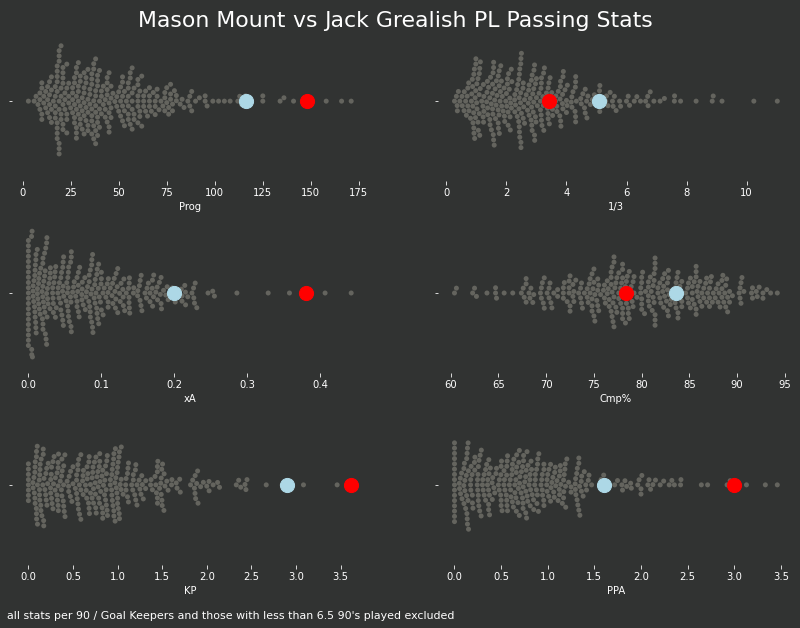

In [21]:
#creation of beeswarm grid
fig, axes = plt.subplots(3,2,figsize = (14,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer(ticks values)
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#creating counters
counter = 0
counter2 = 0
met_counter = 0

#create initial for loop
for i,ax in zip(df2['Player'],axes.flatten()):
    ax.set_facecolor(background)
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
    #getting rid of spines 
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    sns.swarmplot(x=metrics[met_counter],data = df2,ax =axes[counter,counter2],zorder=1,color = '#64645e')
    ax.set_xlabel(f'{metrics[met_counter]}', color = 'white')
    
    #compare players
    #df2.Player.unique()
    for x in range(len(df2['Player'])):
        if df2['Player'][x] == 'Jack Grealish':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='red',zorder=2)
    for x in range(len(df2['Player'])):
        if df2['Player'][x] == 'Mason Mount':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='lightblue',zorder=2)        

    met_counter +=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 ==1:
        counter2 = 0
        counter +=1
        
s='<Mason Mount> vs <Jack Grealish> PL Passing Stats'
highlight_text.fig_text(s=s,
                x=.25, y=.88,
                #highlight_weights = ['bold'],
                fontsize=22,
                fontfamily = 'Andale Mono',
                color = text_color,
                #highlight_colors = ['#6CABDD'],
                va='center'
               )      

fig.text(.12,.05,"all stats per 90 / Goal Keepers and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color=text_color)

